# Very nice plots for our nice poster :)

In [68]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Patch

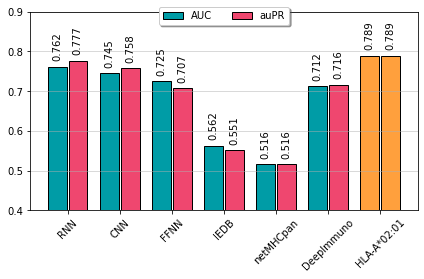

In [94]:

def bar_plot(models, ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point."""
        # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    text_offset_y = 0.02
    text_offset_x = 0.1

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):

            if models[x] != "HLA-A*02:01":
                bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)], edgecolor = "black")
                text = ax.text(x + x_offset - text_offset_x, y + text_offset_y, y,rotation=90)
            else:
                bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color="#FFA03D", edgecolor = "black")
                text = ax.text(x + x_offset - text_offset_x, y + text_offset_y, y,rotation=90)



        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        legend_elements = [Patch(facecolor='#009ca6', edgecolor='k',label='AUC'),
                         Patch(facecolor='#ef476f', edgecolor='k',label='auPR')]
        # ax.legend(bars, data.keys(), loc='upper right')
        ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True, shadow=True)
    
    ax.set_xticks(np.arange(len(models)))
    ax.set_xticklabels(models)


data = {
    "ROC": [0.762, 0.745, 0.725, 0.562, 0.516, 0.712,0.789],
    "PR": [0.777, 0.758, 0.707, 0.551, 0.516, 0.716, 0.789],

}

models = [ "RNN", "CNN", "FFNN", "IEDB", "netMHCpan","DeepImmuno","HLA-A*02:01"]
fig, ax = plt.subplots()
bar_plot(models, ax, data, colors=["#009ca6", "#ef476f"], total_width=.8, single_width=.9)
# plt.axhline(y=0.5, color='black', linestyle='--')


plt.tight_layout()
plt.ylim(0.4,0.9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis="y",alpha=0.6)
plt.savefig("../plots/ROC_PR_barplot.png", dpi = 300,bbox_inches = 'tight',pad_inches =0.1)
plt.show()




## Plotting occlusion analysis

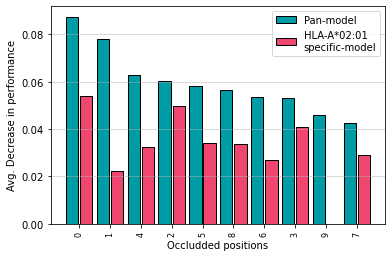

In [95]:
occlussions_simple = [0, 2, 3, 5, 8, 4, 7, 6, 1,9]
decreases_simple = [0.054027923851453295, 0.04960902531490772, 0.04069785169785173, 0.03427740410093353, 0.0336047857812564, 0.03236961395784928, 0.029088051852757753, 0.0270172027230851, 0.022235497941380324,0]
std_simple = [0.016764456337610516, 0.016675661572867685, 0.024953664766016143, 0.020798546866867232, 0.02105606065479808, 0.018955887720415326, 0.02202438643299184, 0.020755729340329827, 0.015150808052680636,0]

occlussions_pan = [0, 1, 4, 2, 5, 8, 6, 3, 9, 7]
decreases_pan = [0.08754863421822519, 0.07788325850557737, 0.06283572174694667, 0.060447732929267715, 0.05839012893822749, 0.0565591534332198, 0.053579318058530896, 0.053070306655740924, 0.04606447038813156, 0.042538241592338044]
std_pan = [0.01578518282976036, 0.01645888506682296, 0.02635943532649634, 0.023800070358444114, 0.026274392294935323, 0.025130846441017117, 0.026535283144795124, 0.026917007439840126, 0.02310938183744076, 0.023305932614070955]


sorted_simple = [decreases_simple[occlussions_simple.index(occ)] for occ in occlussions_pan]



fig = plt.figure()
plt.bar(np.arange(len(decreases_pan)) - 0.23, decreases_pan,width=0.4,label="Pan-model",color="#009ca6",edgecolor = "black")
plt.bar(np.arange(len(decreases_pan)) + 0.23, sorted_simple,width=0.4,label="HLA-A*02:01\nspecific-model", color="#ef476f",edgecolor = "black")
# plt.errorbar(np.arange(len(decreases_pan)), decreases_pan,yerr=sorted_std, fmt="", color="k", ls="",capsize=10)
plt.xticks(np.arange(len(occlussions_pan)),occlussions_pan,rotation=90, size=8)
plt.xlabel("Occludded positions")
plt.ylabel("Avg. Decrease in performance")
plt.grid(axis="y",alpha=0.6)
plt.legend()
plt.savefig("../plots/occlusion_analysis.png",dpi = 300)